# Project 3

## Minimum Spanning Tree

### Strategy 1

### Question 1

Start with all the assets available in the Investment Funnel for the entire period. Divide this period into half, where the first half is used for training and the second half for testing.

Now calculate the Sharpe Ratio for all the assets for the first half (the training set).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,Unnamed: 0,Alm. Brand Invest Mix ETIK,Alm. Brand Invest Mix Offensiv ETIK,Alm. Brand Invest Korte Obligation ETIK,Alm. Brand Invest Europæiske Aktier ETIK,Alm. Brand Invest Globale Aktier ETIK,Wealth Invest Amalie Global AK,Alm. Brand Invest Nordiske Aktier ETIK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,...,iShares STOXX Eurp 600 P & H Goods (DE),iShares Core MSCI Pac ex-Jpn ETF USD Acc,iShares MSCI ACWI ETF USD Acc,iShares Core S&P 500 ETF USD Acc,iShares S&P 500 EUR Hedged ETF Acc,iShares MSCI Japan Small Cap ETF USD Dis,Xtrackers S&P Global Infras Swap ETF 1C,Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
0,2012-01-11,0.015134,0.006069,0.000887,0.005416,0.021335,0.016686,0.030303,0.024658,-0.000281,...,-0.000654,0.015346,0.020060,0.029827,0.012299,0.004881,0.006464,0.004637,0.003364,0.003310
1,2012-01-18,0.006833,0.008828,0.000000,0.012080,0.001885,0.005471,0.022186,0.008594,0.001265,...,0.012985,0.009096,0.006481,0.001870,0.010046,-0.008594,0.001089,0.006495,0.003850,0.000941
2,2012-01-25,0.002644,0.011814,-0.000197,0.005323,0.006741,0.006696,0.004281,-0.009657,0.007438,...,0.000486,0.015004,0.004967,0.001372,0.009221,0.000421,-0.008601,-0.008965,0.004883,0.001401
3,2012-02-01,0.009142,0.014703,0.000984,0.013798,0.000156,-0.007068,0.021315,0.024092,0.011283,...,0.028292,-0.003084,-0.003798,-0.018339,0.008531,0.009153,0.016737,0.015042,0.008338,0.002710
4,2012-02-08,0.016551,0.013140,-0.001180,0.022472,0.016815,0.014096,0.035624,0.024832,0.003030,...,0.003624,0.018755,0.015051,0.015560,0.013891,0.002510,0.002792,-0.002704,0.001531,-0.000444


In [4]:
df.shape

(503, 718)

In [5]:
df.columns

Index(['Unnamed: 0', 'Alm. Brand Invest Mix ETIK',
       'Alm. Brand Invest Mix Offensiv ETIK',
       'Alm. Brand Invest Korte Obligation ETIK',
       'Alm. Brand Invest Europæiske Aktier ETIK',
       'Alm. Brand Invest Globale Aktier ETIK',
       'Wealth Invest Amalie Global AK',
       'Alm. Brand Invest Nordiske Aktier ETIK', 'BankInvest Danske Aktier W',
       'BankInvest Emerging Markets Obl A',
       ...
       'iShares STOXX Eurp 600 P & H Goods (DE)',
       'iShares Core MSCI Pac ex-Jpn ETF USD Acc',
       'iShares MSCI ACWI ETF USD Acc', 'iShares Core S&P 500 ETF USD Acc',
       'iShares S&P 500 EUR Hedged ETF Acc',
       'iShares MSCI Japan Small Cap ETF USD Dis',
       'Xtrackers S&P Global Infras Swap ETF 1C',
       'Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH',
       'Xtrackers II EUR Corporate Bond ETF 1C',
       'iShares Pfandbriefe ETF (DE)'],
      dtype='object', length=718)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Columns: 718 entries, Unnamed: 0 to iShares Pfandbriefe ETF (DE)
dtypes: datetime64[ns](1), float64(717)
memory usage: 2.8 MB


In [7]:
train = df.iloc[:251, :]
test = df.iloc[251:, :]

In [8]:
print(train.shape)
print(test.shape)

(251, 718)
(252, 718)


In [9]:
returns = train.iloc[:,1:]
print(returns)

     Alm. Brand Invest Mix ETIK  Alm. Brand Invest Mix Offensiv ETIK  \
0                      0.015134                             0.006069   
1                      0.006833                             0.008828   
2                      0.002644                             0.011814   
3                      0.009142                             0.014703   
4                      0.016551                             0.013140   
..                          ...                                  ...   
246                   -0.001288                            -0.002720   
247                    0.005238                             0.009741   
248                   -0.001924                            -0.002260   
249                    0.004418                             0.005028   
250                   -0.001839                            -0.001704   

     Alm. Brand Invest Korte Obligation ETIK  \
0                                   0.000887   
1                                   0.0

In [10]:
def annualize_returns(returns, data_freq='weekly'):
	return (1+returns)**52-1

def calc_geomean(returns):
	return (np.prod(1 + returns))**(1/len(returns)) - 1

def annualize_stddev(stddev, data_freq='weekly'):
	return stddev*np.sqrt(52)


In [11]:
for i in range(len(train.columns)):
	avr_return = calc_geomean(returns)
	ann_avr_return = annualize_returns(avr_return, data_freq='weekly')

print(ann_avr_return)
len(ann_avr_return)

Alm. Brand Invest Mix ETIK                  0.072858
Alm. Brand Invest Mix Offensiv ETIK         0.088213
Alm. Brand Invest Korte Obligation ETIK     0.008095
Alm. Brand Invest Europæiske Aktier ETIK    0.086263
Alm. Brand Invest Globale Aktier ETIK       0.101740
                                              ...   
iShares MSCI Japan Small Cap ETF USD Dis    0.140640
Xtrackers S&P Global Infras Swap ETF 1C     0.105699
Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH    0.041007
Xtrackers II EUR Corporate Bond ETF 1C      0.040348
iShares Pfandbriefe ETF (DE)                0.025412
Length: 717, dtype: float64


717

In [12]:
for i in range(len(train)):
	stddev = returns.std()
	ann_stddev = (annualize_stddev(stddev, data_freq='weekly'))

print(ann_stddev)
len(ann_stddev)

Alm. Brand Invest Mix ETIK                  0.103745
Alm. Brand Invest Mix Offensiv ETIK         0.134341
Alm. Brand Invest Korte Obligation ETIK     0.009376
Alm. Brand Invest Europæiske Aktier ETIK    0.167789
Alm. Brand Invest Globale Aktier ETIK       0.157152
                                              ...   
iShares MSCI Japan Small Cap ETF USD Dis    0.167221
Xtrackers S&P Global Infras Swap ETF 1C     0.137147
Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH    0.052936
Xtrackers II EUR Corporate Bond ETF 1C      0.020619
iShares Pfandbriefe ETF (DE)                0.014199
Length: 717, dtype: float64


717

In [13]:
sharpe_ratio=ann_avr_return/ann_stddev
sharpe_ratio

Alm. Brand Invest Mix ETIK                  0.702279
Alm. Brand Invest Mix Offensiv ETIK         0.656639
Alm. Brand Invest Korte Obligation ETIK     0.863369
Alm. Brand Invest Europæiske Aktier ETIK    0.514117
Alm. Brand Invest Globale Aktier ETIK       0.647400
                                              ...   
iShares MSCI Japan Small Cap ETF USD Dis    0.841046
Xtrackers S&P Global Infras Swap ETF 1C     0.770697
Xtrackers II Glb Infl-Lnkd Bd ETF 1CEURH    0.774647
Xtrackers II EUR Corporate Bond ETF 1C      1.956836
iShares Pfandbriefe ETF (DE)                1.789625
Length: 717, dtype: float64

### Question 2

Pick up the top 4-5 assets with the highest Sharpe Ratios for the training set.

In [14]:
top_5 = sharpe_ratio.sort_values(ascending = False).head(5)
top_5

Nordea Invest Euro High Yield Bonds KL    2.717760
Maj Invest Danske Obligationer            2.701868
Nykredit Invest Engros EuroKredit         2.698767
Nykredit Invest Bæredygtige Kreditobli    2.558705
Nordea Invest Engros Corporate Bonds      2.463309
dtype: float64

In [15]:
top5_list = list(top_5.index)
top5_list

['Nordea Invest Euro High Yield Bonds KL',
 'Maj Invest Danske Obligationer',
 'Nykredit Invest Engros EuroKredit',
 'Nykredit Invest Bæredygtige Kreditobli',
 'Nordea Invest Engros Corporate Bonds']

### Question 3

Calculate the covariance matrix for these assets.

In [16]:
top_5 = train[train.columns.intersection(top5_list)]
top_5

,Maj Invest Danske Obligationer,Nordea Invest Engros Corporate Bonds,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Nykredit Invest Bæredygtige Kreditobli
0,0.000957,0.003564,0.010978,-0.006240,-0.000196
1,-0.000191,0.006477,0.012636,0.014027,0.006576
2,-0.003157,0.007265,0.014915,0.006003,0.005656
3,0.003071,0.011231,0.012679,0.011109,0.010084
4,-0.002583,0.003872,0.015840,0.002936,0.001728
...,...,...,...,...,...
246,0.001663,0.005462,0.000178,0.005149,0.004698
247,0.000293,-0.005037,0.000623,-0.005140,-0.005186
248,-0.001171,-0.002283,0.000445,-0.003196,-0.003589
249,0.000195,0.001691,0.004443,0.002081,0.001801


In [17]:
top_5.cov()

,Maj Invest Danske Obligationer,Nordea Invest Engros Corporate Bonds,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Nykredit Invest Bæredygtige Kreditobli
Maj Invest Danske Obligationer,0.000004,0.000004,0.000002,0.000004,0.000004
Nordea Invest Engros Corporate Bonds,0.000004,0.000012,0.000011,0.000011,0.000010
Nordea Invest Euro High Yield Bonds KL,0.000002,0.000011,0.000028,0.000011,0.000010
Nykredit Invest Engros EuroKredit,0.000004,0.000011,0.000011,0.000013,0.000012
Nykredit Invest Bæredygtige Kreditobli,0.000004,0.000010,0.000010,0.000012,0.000011


### Strategy 2

### Question 4

Pick up the top 200 assets with the highest Sharpe Ratios for the training set.

In [20]:
top_200 = sharpe_ratio.sort_values(ascending = False).head(200)
top200_list = list(top_200.index)

In [21]:
top_200 = train[train.columns.intersection(top200_list)]
top_200 = top_200.iloc[:200,:]

In [22]:
corr_200 = top_200.corr(method="spearman")

### Question 5

Run the Minimum Spanning Tree method on this set a number of times until you have only about 4-5 assets left.

In [23]:
corr_table = corr_200.stack().reset_index()
corr_table.columns = ["Asset1", "Asset2", "Corr"]
corr_table

,Asset1,Asset2,Corr
0,BankInvest Danske Aktier W,BankInvest Danske Aktier W,1.000000
1,BankInvest Danske Aktier W,BankInvest Danske Aktier A,1.000000
2,BankInvest Danske Aktier W,BankInvest Almen Bolig udb,-0.068475
3,BankInvest Danske Aktier W,BankInvest Optima 10 Akk. KL,0.620318
4,BankInvest Danske Aktier W,BankInvest Lange Danske Obligationer W,-0.124905
...,...,...,...
39995,iShares Pfandbriefe ETF (DE),iShares NASDAQ 100 ETF USD Acc,0.037519
39996,iShares Pfandbriefe ETF (DE),Xtrackers MSCI Wld Consumer Dscrt ETF 1C,0.009468
39997,iShares Pfandbriefe ETF (DE),iShares Core S&P 500 ETF USD Acc,-0.002238
39998,iShares Pfandbriefe ETF (DE),Xtrackers II EUR Corporate Bond ETF 1C,0.783150


In [31]:
import pandas as pd
import numpy as np
import networkx as nx

from sklearn.decomposition import PCA


def MinimumSpanningTree(dataset):
    corr = dataset.corr(method="spearman")              # calculate the correlation
    distance_corr = (2*(1-corr))**0.5                   # calculate the distance
    mask = np.triu(np.ones_like(corr, dtype=np.bool))   # get only the upper half of the matrix
    distance_corr = distance_corr*mask 
   
    # use the correlation matrix to create links
    links = distance_corr.stack().reset_index(level=1)
    links.columns = ["var2","value"]
    links = links.reset_index()
    links = links.replace(0, np.nan)                                # drop 0 values from the matrix
    links = links.dropna(how='any', axis=0)
    links.columns = ["var1", "var2", "value"]                       # rename the columns
    links_filtered = links.loc[(links["var1"] != links["var2"])]    # filter out self-correlations
    
    # Create the graph
    G = nx.Graph() 
    for i in range(len(corr)):                                          # add nodes
        G.add_node(corr.index[i])
    tuples = list(links_filtered.itertuples(index=False, name=None))    # add edges with weight
    G.add_weighted_edges_from(tuples)
    
    # Create a MST from the full graph
    mst = nx.minimum_spanning_tree(G)
    
    # Save the nodes with degree one
    degrees = [val for (node, val) in mst.degree()]
    df = pd.DataFrame(degrees, corr.index)
    df.columns = ["degree"]
    subset = df[df["degree"] == 1].index.tolist()

    # Create a new dataframe with only the assets from the subset
    subset_df = dataset.loc[:, dataset.columns.isin(subset)]
    
    # Calculate the average correlation of the subset
    corr_subset = subset_df.corr(method="spearman")
    corr_avg=corr_subset.mean().mean()
    
    # Calculate the PDI for the subset
    pca = PCA()
    pca.fit(corr_subset)
    value = 0
    for i in range(1, corr_subset.shape[1]):
        value = value + i*pca.explained_variance_ratio_[i-1]
    PDI = 2*value - 1

    return subset_df

In [32]:
new_df = train
while len(new_df.columns) > 6:
    new_df = MinimumSpanningTree(new_df)
print(new_df)

     BI Private Equity  BLS Invest Danske Aktier KL  \
0            -0.000341                     0.040005   
1             0.027318                     0.025952   
2             0.062323                     0.005700   
3            -0.020807                     0.015756   
4             0.038824                     0.032036   
..                 ...                          ...   
246          -0.000517                    -0.001317   
247          -0.008021                    -0.007248   
248           0.024257                    -0.022774   
249          -0.000255                     0.006707   
250          -0.000764                     0.006434   

     Danske Invest Bioteknologi Indeks KL  \
0                                0.119967   
1                                0.023630   
2                                0.030809   
3                                0.011589   
4                                0.034456   
..                                    ...   
246                     

In [33]:
new_df.cov()

,BI Private Equity,BLS Invest Danske Aktier KL,Danske Invest Bioteknologi Indeks KL,HP Invest Danske Obligationer Akk KL W,Maj Invest Kontra W,iShares EM Infrastructure ETF USD Dist
BI Private Equity,3.162539e-04,-2.283904e-05,-4.392039e-05,4.464158e-07,-1.399327e-05,-0.000040
BLS Invest Danske Aktier KL,-2.283904e-05,2.844631e-04,3.499728e-04,3.127063e-08,5.442240e-07,0.000201
Danske Invest Bioteknologi Indeks KL,-4.392039e-05,3.499728e-04,1.548087e-03,3.329419e-07,2.468736e-05,0.000302
HP Invest Danske Obligationer Akk KL W,4.464158e-07,3.127063e-08,3.329419e-07,1.454530e-06,4.961505e-07,0.000002
Maj Invest Kontra W,-1.399327e-05,5.442240e-07,2.468736e-05,4.961505e-07,4.759307e-05,0.000034
iShares EM Infrastructure ETF USD Dist,-3.989423e-05,2.013346e-04,3.015353e-04,2.463697e-06,3.405250e-05,0.000661


In [34]:
top_5.cov()

,Maj Invest Danske Obligationer,Nordea Invest Engros Corporate Bonds,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Nykredit Invest Bæredygtige Kreditobli
Maj Invest Danske Obligationer,0.000004,0.000004,0.000002,0.000004,0.000004
Nordea Invest Engros Corporate Bonds,0.000004,0.000012,0.000011,0.000011,0.000010
Nordea Invest Euro High Yield Bonds KL,0.000002,0.000011,0.000028,0.000011,0.000010
Nykredit Invest Engros EuroKredit,0.000004,0.000011,0.000011,0.000013,0.000012
Nykredit Invest Bæredygtige Kreditobli,0.000004,0.000010,0.000010,0.000012,0.000011


In [35]:
weight=1/len(new_df.columns)
weights = np.full((6, 1), weight, dtype=float)
weights

array([[0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667]])

In [36]:
test_portfolio = weights * 100000

In [37]:
test_portfolio

array([[16666.66666667],
       [16666.66666667],
       [16666.66666667],
       [16666.66666667],
       [16666.66666667],
       [16666.66666667]])

### Question 6

Calculate the covariance matrix for these assets now and compare with the covariance matrix from strategy 1.

In [38]:
test_list = ['Danske Invest Danm In ex OMXC20 DKK d', 'Nordea Invest Lange Obligationer KL', 'Danske Invest Danm In x OMXC20 DKK Wd', 'Lån & Spar Invest - Obligationer', 'Danske Inv Flexin Danske Obl KL']
test_list

['Danske Invest Danm In ex OMXC20 DKK d',
 'Nordea Invest Lange Obligationer KL',
 'Danske Invest Danm In x OMXC20 DKK Wd',
 'Lån & Spar Invest - Obligationer',
 'Danske Inv Flexin Danske Obl KL']

In [39]:
top5_mst = train[train.columns.intersection(test_list)]
top5_mst

,Danske Invest Danm In ex OMXC20 DKK d,Danske Invest Danm In x OMXC20 DKK Wd,Danske Inv Flexin Danske Obl KL,Lån & Spar Invest - Obligationer,Nordea Invest Lange Obligationer KL
0,0.026842,0.026842,-0.000395,-0.000111,0.002655
1,0.052388,0.052388,0.000395,0.000555,0.001040
2,-0.007053,-0.007053,-0.005921,-0.005765,-0.011619
3,-0.004941,-0.004941,0.004268,0.003680,0.011660
4,0.017587,0.017587,-0.001581,-0.002555,-0.005668
...,...,...,...,...,...
246,-0.004175,-0.004175,0.003406,0.001461,0.007413
247,0.008385,0.008385,-0.001261,-0.000561,-0.004396
248,-0.015954,-0.015954,-0.002913,-0.003706,-0.005663
249,0.010219,0.010219,-0.000195,0.000789,0.001448


In [40]:
top5_mst.cov()

,Danske Invest Danm In ex OMXC20 DKK d,Danske Invest Danm In x OMXC20 DKK Wd,Danske Inv Flexin Danske Obl KL,Lån & Spar Invest - Obligationer,Nordea Invest Lange Obligationer KL
Danske Invest Danm In ex OMXC20 DKK d,0.000351,0.000351,-0.000006,-0.000006,-0.000014
Danske Invest Danm In x OMXC20 DKK Wd,0.000351,0.000351,-0.000006,-0.000006,-0.000014
Danske Inv Flexin Danske Obl KL,-0.000006,-0.000006,0.000008,0.000006,0.000013
Lån & Spar Invest - Obligationer,-0.000006,-0.000006,0.000006,0.000006,0.000011
Nordea Invest Lange Obligationer KL,-0.000014,-0.000014,0.000013,0.000011,0.000025


### Question 7

Calculate average return, std for the two strategies and compare.

In [42]:
#Strategy 1
for i in range(len(top_5.columns)):
	avr_return= calc_geomean(top_5)
	ann_avr_return_s1 = annualize_returns(avr_return, data_freq='weekly')

print(np.mean(ann_avr_return_s1))

0.0673913651436826


In [43]:
#Strategy 2
for i in range(len(top5_mst.columns)):
	avr_return = calc_geomean(top5_mst)
	ann_avr_return_s2 = annualize_returns(avr_return, data_freq='weekly')

print(np.mean(ann_avr_return_s2))

0.0963710770127364


### Question 8

Calculate and compare the Sharpe ratio for the two strategies.

In [44]:
#Strategy 1
for i in range(len(top_5)):
	stddev = top_5.std()
	ann_stddev_s1 = (annualize_stddev(stddev, data_freq='weekly'))

sharpe_ratio_s1 = ann_avr_return_s1/ann_stddev_s1
np.mean(sharpe_ratio_s1)

2.628081708883318

In [45]:
#Strategy 2
for i in range(len(top5_mst)):
	stddev = top5_mst.std()
	ann_stddev_s2 = (annualize_stddev(stddev, data_freq='weekly'))

sharpe_ratio_s2 = ann_avr_return_s2/ann_stddev_s2
np.mean(sharpe_ratio_s2)

1.3886439733506994

### Question 9

Calculate and compare maximum drawdown for the two strategies.

In [46]:
#Strategy 1
av_return_s1 = []
for i in range(len(top_5)):
  av_return_s1.append(np.mean(top_5.iloc[i, :])+1)
  av_return_s1[i] = av_return_s1[i]*1000000

In [47]:
s1_diff = pd.DataFrame(av_return_s1, columns = ['returns'])
s1_diff

,returns
0,1.001813e+06
1,1.007905e+06
2,1.006136e+06
3,1.009635e+06
4,1.004359e+06
...,...
246,1.003430e+06
247,9.971106e+05
248,9.980409e+05
249,1.002042e+06


In [48]:
s1_diff['difference'] = 0
for i in range(len(s1_diff)):
  if i-1 == -1:
    s1_diff.iloc[i, 1] = 0
  else:
    s1_diff.iloc[i, 1] = s1_diff.iloc[i, 0] - s1_diff.iloc[i-1, 0]
s1_diff

,returns,difference
0,1.001813e+06,0.000000
1,1.007905e+06,6092.230132
2,1.006136e+06,-1768.508732
3,1.009635e+06,3498.423875
4,1.004359e+06,-5276.258413
...,...,...
246,1.003430e+06,3129.552134
247,9.971106e+05,-6319.243258
248,9.980409e+05,930.302671
249,1.002042e+06,4001.499953


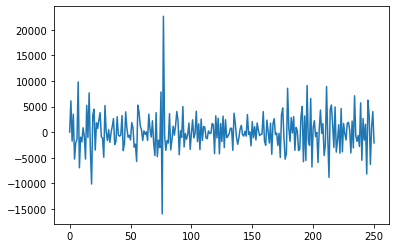

In [49]:
s1_diff.difference.plot()

In [50]:
min(s1_diff.difference)

-15995.53838833503

In [51]:
#Strategy 2
av_return_s2 = []
for i in range(len(top5_mst)):
  av_return_s2.append(np.mean(top5_mst.iloc[i, :])+1)
  av_return_s2[i] = av_return_s2[i]*1000000

In [52]:
s2_diff = pd.DataFrame(av_return_s2, columns = ['returns'])
s2_diff

,returns
0,1.011167e+06
1,1.021353e+06
2,9.925178e+05
3,1.001945e+06
4,1.005074e+06
...,...
246,1.000786e+06
247,1.002110e+06
248,9.911621e+05
249,1.004496e+06


In [53]:
s2_diff['difference'] = 0
for i in range(len(s2_diff)):
  if i-1 == -1:
    s2_diff.iloc[i, 1] = 0
  else:
    s2_diff.iloc[i, 1] = s2_diff.iloc[i, 0] - s2_diff.iloc[i-1, 0]
s2_diff

,returns,difference
0,1.011167e+06,0.000000
1,1.021353e+06,10186.582926
2,9.925178e+05,-28835.357349
3,1.001945e+06,9427.301588
4,1.005074e+06,3128.803354
...,...,...
246,1.000786e+06,-4079.683985
247,1.002110e+06,1324.348937
248,9.911621e+05,-10948.297848
249,1.004496e+06,13333.828035


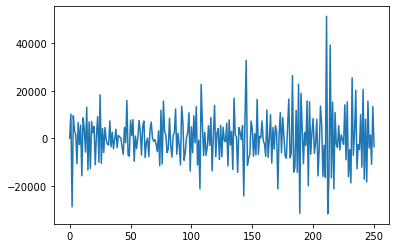

In [54]:
s2_diff.difference.plot()

In [55]:
min(s2_diff.difference)

-31808.756899318658

## Hierarchical Clustering

Continue now with the top 200 assets with the highest Sharpe Ratios for the training set.

### Strategy 3

### Question 10

Run the Hierarchical Clustering method on this set to make three clusters.

In [56]:
from sklearn.preprocessing import normalize
data_scaled = normalize(top_200)
data_scaled = pd.DataFrame(data_scaled, columns=top_200.columns)
data_scaled.head()

,BankInvest Danske Aktier W,BankInvest Danske Aktier A,BankInvest Almen Bolig udb,BankInvest Optima 10 Akk. KL,BankInvest Lange Danske Obligationer W,BankInvest Korte Danske Obligationer W,BankInvest Lange Danske Obligationer A,BankInvest Korte Danske Obl Akk A,BankInvest Korte Danske Obligationer A,BankInvest Korte Danske Obl Akk W,...,iShares Core S&P 500 ETF USD Dist,Xtrackers MSCI Wld Info Tech ETF 1C,Xtrackers MSCI Wld Consumer Stp ETF 1C,Xtrackers MSCI World Health Care ETF 1C,iShares MSCI USA ETF USD Acc,iShares NASDAQ 100 ETF USD Acc,Xtrackers MSCI Wld Consumer Dscrt ETF 1C,iShares Core S&P 500 ETF USD Acc,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
0,0.127848,0.127848,0.001526,0.037683,-0.002580,0.002254,-0.002580,-0.001790,0.002254,-0.001790,...,0.154598,0.126431,0.011931,0.111747,0.159913,0.186329,0.148350,0.154652,0.017443,0.017164
1,0.056193,0.056193,-0.003849,0.002550,-0.001953,-0.002841,-0.001953,-0.003951,-0.002841,-0.003951,...,0.012185,0.061412,-0.063880,0.011412,0.014811,0.079584,0.078238,0.012225,0.025171,0.006155
2,-0.103137,-0.103137,-0.006290,-0.045800,-0.111668,-0.010446,-0.111668,-0.003690,-0.010446,-0.003690,...,0.014239,0.104611,-0.048795,-0.161109,0.017119,0.040543,0.069918,0.014650,0.052152,0.014957
3,0.121916,0.121916,0.006462,0.024272,0.037685,0.007157,0.037685,0.006122,0.007157,0.006122,...,-0.092833,-0.033502,-0.053549,-0.031223,-0.088077,-0.041566,-0.029094,-0.092805,0.042196,0.013715
4,0.134364,0.134364,-0.009554,-0.013178,-0.039456,-0.008817,-0.039456,-0.008406,-0.008817,-0.008406,...,0.083906,0.113736,0.025765,-0.008568,0.085058,0.102902,0.109736,0.084196,0.008286,-0.002403


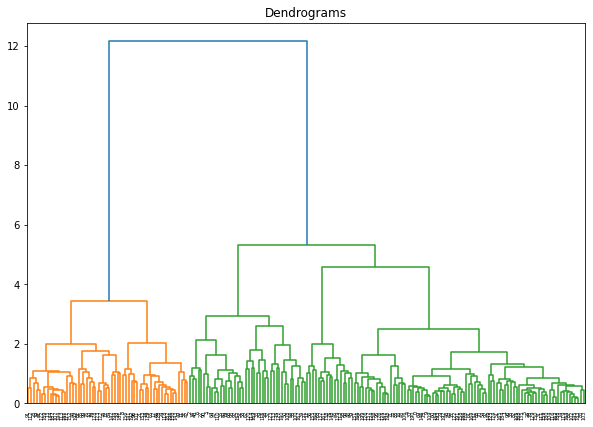

In [57]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

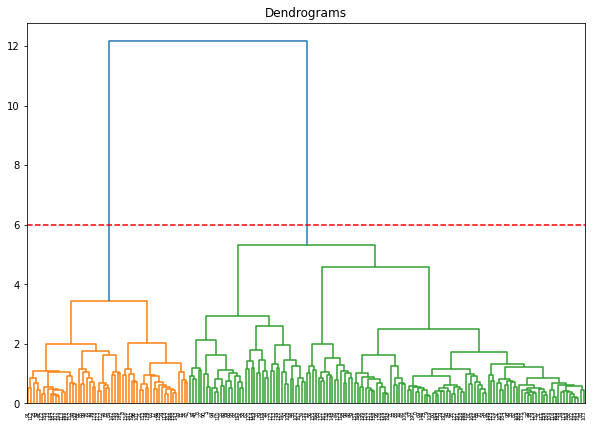

In [58]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

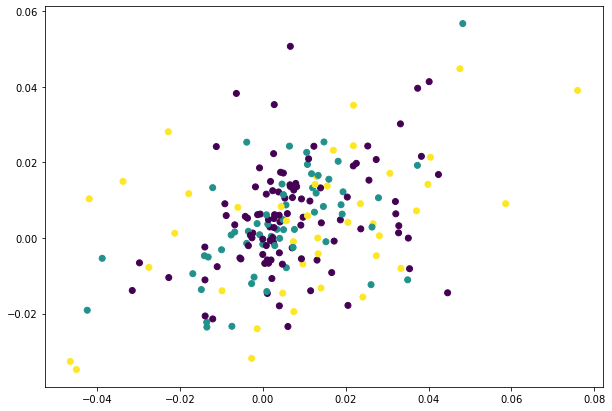

In [60]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Maj Invest Danske Obligationer'], data_scaled['iShares Pfandbriefe ETF (DE)'], c=cluster.labels_) 

In [61]:
cluster_array = cluster.fit_predict(data_scaled)

### Question 11

Pick the asset with the highest Sharpe ratio from the two smaller clusters.

In [62]:
unique, counts = np.unique(cluster_array, return_counts=True)
dict(zip(unique, counts))

{0: 100, 1: 58, 2: 42}

In [63]:
group_0 = []
group_1 = []
group_2 = []
for i in range(len(cluster_array)):
    if cluster_array[i] == 0:
        group_0.append(top_200.columns[i])
    elif cluster_array[i] == 1:
        group_1.append(top_200.columns[i])
    elif cluster_array[i] == 2:
        group_2.append(top_200.columns[i])     

In [64]:
cluster1_ratio = sharpe_ratio[sharpe_ratio.index.intersection(group_1)]

In [65]:
max(cluster1_ratio.index)

'iShares MSCI USA ETF USD Acc'

In [66]:
cluster2_ratio = sharpe_ratio[sharpe_ratio.index.intersection(group_2)]
max(cluster2_ratio.index)

'ValueInvest Global Akk A'

### Question 12

Run the Minimum Spanning Three method on the biggest cluster a number of times until you are left with 3-4 assets only.

In [67]:
cluster0 = top_200[top_200.columns.intersection(group_0)]
cluster0

,BankInvest Danske Aktier W,BankInvest Danske Aktier A,BankInvest Lange Danske Obligationer W,BankInvest Korte Danske Obligationer W,BankInvest Korte Danske Obl Akk W,BankInvest Virksomhedsobligationer IG W,BGF Swiss Small & MidCap Opps D2 CHF,BLS Invest Danske Aktier KL,Danske Invest Danmark Indeks KL DKK W d,Danske Invest Danm In ex OMXC20 DKK d,...,KAB / Lejerbo Invest Obl. 1 Lejerbo,LD Mixed Obligationer,LD Aktier & Obligationer,BankInvest Lange Danske Obl Akk. W,iShares Core S&P 500 ETF USD Dist,Xtrackers MSCI Wld Info Tech ETF 1C,iShares NASDAQ 100 ETF USD Acc,iShares Core S&P 500 ETF USD Acc,Xtrackers II EUR Corporate Bond ETF 1C,iShares Pfandbriefe ETF (DE)
0,0.024658,0.024658,-0.000498,0.000435,-0.000345,0.002853,0.002904,0.040005,0.023440,0.026842,...,0.001235,0.003422,0.008107,-0.000498,0.029817,0.024384,0.035937,0.029827,0.003364,0.003310
1,0.008594,0.008594,-0.000299,-0.000435,-0.000604,0.004577,0.036081,0.025952,0.012058,0.052388,...,0.000352,0.001010,0.000869,-0.000299,0.001864,0.009393,0.012172,0.001870,0.003850,0.000941
2,-0.009657,-0.009657,-0.010456,-0.000978,-0.000346,0.006403,0.009624,0.005700,0.003594,-0.007053,...,-0.001409,-0.003785,-0.001665,-0.010456,0.001333,0.009795,0.003796,0.001372,0.004883,0.001401
3,0.024092,0.024092,0.007447,0.001414,0.001210,0.010645,0.012935,0.015756,0.030110,-0.004941,...,0.001764,0.004940,0.005583,0.007447,-0.018345,-0.006620,-0.008214,-0.018339,0.008338,0.002710
4,0.024832,0.024832,-0.007292,-0.001630,-0.001554,0.001332,0.031438,0.032036,0.019057,0.017587,...,-0.000704,-0.000504,0.005264,-0.007292,0.015507,0.021020,0.019017,0.015560,0.001531,-0.000444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.032693,0.032693,0.000912,0.000679,0.000697,0.003323,0.021127,0.023090,0.028646,0.027032,...,-0.000319,0.001670,0.014905,0.000912,0.033124,0.034291,0.030009,0.033181,0.001936,-0.001393
196,-0.038757,-0.038757,0.001848,0.000444,0.000495,0.001612,-0.008798,-0.019670,-0.033902,-0.026100,...,0.000991,0.000681,-0.004661,0.001848,-0.018071,-0.011061,-0.014327,-0.018011,0.002969,0.001363
197,0.017094,0.017094,-0.001948,-0.000222,-0.000247,-0.000495,0.020349,0.023893,0.021698,0.018834,...,-0.000990,-0.000340,0.007192,-0.001948,0.019542,0.016751,0.022258,0.019587,-0.000175,-0.000354
198,0.019912,0.019912,0.004930,0.001554,0.001568,0.007803,0.014376,0.006752,0.017808,-0.005529,...,0.001900,0.003800,0.015388,0.004930,0.062621,0.079540,0.087814,0.062681,0.007136,0.004344


In [68]:
new_df2 = cluster0
while len(new_df2.columns) > 5:
    new_df2 = MinimumSpanningTree(new_df2)
print(new_df2)

     Danske Invest Danm In x OMXC20 DKK Wd  \
0                                 0.026842   
1                                 0.052388   
2                                -0.007053   
3                                -0.004941   
4                                 0.017587   
..                                     ...   
195                               0.027032   
196                              -0.026100   
197                               0.018834   
198                              -0.005529   
199                               0.011175   

     SEBinvest AKL US HY Bonds (Columbia) P  \
0                                  0.007369   
1                                  0.001111   
2                                  0.004347   
3                                  0.008933   
4                                  0.007119   
..                                      ...   
195                                0.002957   
196                                0.017618   
197                     

### Question 13

Calculate the covariance matrix for these assets now and compare with the covariance matrix from strategy 1 and 2.

In [69]:
new_df2.cov()

,Danske Invest Danm In x OMXC20 DKK Wd,SEBinvest AKL US HY Bonds (Columbia) P,Sparinvest INDEX Glb Akt Min Risiko KL,Formuepleje Fokus
Danske Invest Danm In x OMXC20 DKK Wd,0.000287,0.000038,0.000121,-0.000003
SEBinvest AKL US HY Bonds (Columbia) P,0.000038,0.000039,0.000029,0.000010
Sparinvest INDEX Glb Akt Min Risiko KL,0.000121,0.000029,0.000273,0.000017
Formuepleje Fokus,-0.000003,0.000010,0.000017,0.000039


In [70]:
new_df.cov()

,BI Private Equity,BLS Invest Danske Aktier KL,Danske Invest Bioteknologi Indeks KL,HP Invest Danske Obligationer Akk KL W,Maj Invest Kontra W,iShares EM Infrastructure ETF USD Dist
BI Private Equity,3.162539e-04,-2.283904e-05,-4.392039e-05,4.464158e-07,-1.399327e-05,-0.000040
BLS Invest Danske Aktier KL,-2.283904e-05,2.844631e-04,3.499728e-04,3.127063e-08,5.442240e-07,0.000201
Danske Invest Bioteknologi Indeks KL,-4.392039e-05,3.499728e-04,1.548087e-03,3.329419e-07,2.468736e-05,0.000302
HP Invest Danske Obligationer Akk KL W,4.464158e-07,3.127063e-08,3.329419e-07,1.454530e-06,4.961505e-07,0.000002
Maj Invest Kontra W,-1.399327e-05,5.442240e-07,2.468736e-05,4.961505e-07,4.759307e-05,0.000034
iShares EM Infrastructure ETF USD Dist,-3.989423e-05,2.013346e-04,3.015353e-04,2.463697e-06,3.405250e-05,0.000661


In [71]:
top_5.cov()

,Maj Invest Danske Obligationer,Nordea Invest Engros Corporate Bonds,Nordea Invest Euro High Yield Bonds KL,Nykredit Invest Engros EuroKredit,Nykredit Invest Bæredygtige Kreditobli
Maj Invest Danske Obligationer,0.000004,0.000004,0.000002,0.000004,0.000004
Nordea Invest Engros Corporate Bonds,0.000004,0.000012,0.000011,0.000011,0.000010
Nordea Invest Euro High Yield Bonds KL,0.000002,0.000011,0.000028,0.000011,0.000010
Nykredit Invest Engros EuroKredit,0.000004,0.000011,0.000011,0.000013,0.000012
Nykredit Invest Bæredygtige Kreditobli,0.000004,0.000010,0.000010,0.000012,0.000011


### Question 14

Calculate average return, std for the two strategies and compare.

In [73]:
#Strategy 1
for i in range(len(new_df.columns)):
	avr_return= calc_geomean(new_df)
	ann_avr_return_s1 = annualize_returns(avr_return, data_freq='weekly')

print(np.mean(ann_avr_return_s1))

0.08133643450784285


In [74]:
#Strategy 2
for i in range(len(new_df2.columns)):
	avr_return = calc_geomean(new_df2)
	ann_avr_return_s2 = annualize_returns(avr_return, data_freq='weekly')

print(np.mean(ann_avr_return_s2))

0.11947523519282599


### Question 15

Calculate and compare the Sharpe ratio for the two strategies.

In [75]:
#Strategy 1
for i in range(len(new_df)):
	stddev = new_df.std()
	ann_stddev_s1 = (annualize_stddev(stddev, data_freq='weekly'))

sharpe_ratio_s1 = ann_avr_return_s1/ann_stddev_s1
np.mean(sharpe_ratio_s1)

0.8079352325625816

In [76]:
#Strategy 2
for i in range(len(new_df2)):
	stddev = new_df2.std()
	ann_stddev_s2 = (annualize_stddev(stddev, data_freq='weekly'))

sharpe_ratio_s2 = ann_avr_return_s2/ann_stddev_s2
np.mean(sharpe_ratio_s2)

1.393885321140015

### Question 16

Calculate and compare maximum drawdown for the two strategies.

In [77]:
#Strategy 1
av_return_s1 = []
for i in range(len(new_df)):
  av_return_s1.append(np.mean(new_df.iloc[i, :])+1)
  av_return_s1[i] = av_return_s1[i]*1000000

In [78]:
s1_diff = pd.DataFrame(av_return_s1, columns = ['returns'])
s1_diff

,returns
0,1.030390e+06
1,1.012953e+06
2,1.012863e+06
3,1.008671e+06
4,1.025794e+06
...,...
246,9.973600e+05
247,9.924370e+05
248,9.903188e+05
249,1.000661e+06


In [79]:
s1_diff['difference'] = 0
for i in range(len(s1_diff)):
  if i-1 == -1:
    s1_diff.iloc[i, 1] = 0
  else:
    s1_diff.iloc[i, 1] = s1_diff.iloc[i, 0] - s1_diff.iloc[i-1, 0]
s1_diff

,returns,difference
0,1.030390e+06,0.000000
1,1.012953e+06,-17437.273474
2,1.012863e+06,-90.200728
3,1.008671e+06,-4191.634298
4,1.025794e+06,17122.972285
...,...,...
246,9.973600e+05,-9255.903007
247,9.924370e+05,-4923.064862
248,9.903188e+05,-2118.175274
249,1.000661e+06,10342.292733


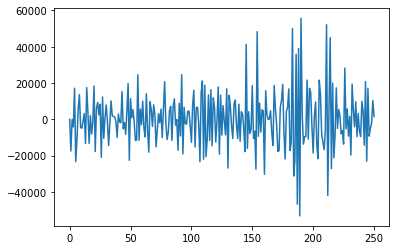

In [80]:
s1_diff.difference.plot()

In [81]:
min(s1_diff.difference)

-53180.74146814761

In [82]:
#Strategy 2
av_return_s2 = []
for i in range(len(new_df2)):
  av_return_s2.append(np.mean(new_df2.iloc[i, :])+1)
  av_return_s2[i] = av_return_s2[i]*1000000

In [83]:
s2_diff = pd.DataFrame(av_return_s2, columns = ['returns'])
s2_diff

,returns
0,1.011823e+06
1,1.010167e+06
2,9.983883e+05
3,9.994691e+05
4,1.006409e+06
...,...
195,1.014620e+06
196,9.957836e+05
197,1.009678e+06
198,1.012669e+06


In [84]:
s2_diff['difference'] = 0
for i in range(len(s2_diff)):
  if i-1 == -1:
    s2_diff.iloc[i, 1] = 0
  else:
    s2_diff.iloc[i, 1] = s2_diff.iloc[i, 0] - s2_diff.iloc[i-1, 0]
s2_diff

,returns,difference
0,1.011823e+06,0.000000
1,1.010167e+06,-1656.526425
2,9.983883e+05,-11778.459476
3,9.994691e+05,1080.796367
4,1.006409e+06,6939.750066
...,...,...
195,1.014620e+06,23248.323422
196,9.957836e+05,-18835.966794
197,1.009678e+06,13894.910646
198,1.012669e+06,2990.709884


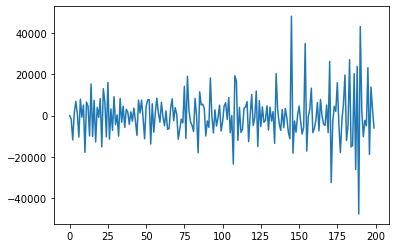

In [85]:
s2_diff.difference.plot()

In [86]:
min(s2_diff.difference)

-47683.314776398125

# Extra questions

The starting point for these questions are the 4-5 assets that you have picked for your
portfolios in strategy 2 and 3. So in total you should perform the following statistical analysis
for each of these 8-10 assets.

In [87]:
new_df.head()

,BI Private Equity,BLS Invest Danske Aktier KL,Danske Invest Bioteknologi Indeks KL,HP Invest Danske Obligationer Akk KL W,Maj Invest Kontra W,iShares EM Infrastructure ETF USD Dist
0,-0.000341,0.040005,0.119967,-0.000185,0.008606,0.014290
1,0.027318,0.025952,0.023630,-0.001019,-0.010395,0.012232
2,0.062323,0.005700,0.030809,0.001206,-0.010565,-0.012298
3,-0.020807,0.015756,0.011589,0.000185,0.003498,0.041806
4,0.038824,0.032036,0.034456,0.000556,-0.006727,0.055619


In [88]:
new_df3=new_df.iloc[:,0]
new_df3

0     -0.000341
1      0.027318
2      0.062323
3     -0.020807
4      0.038824
         ...   
246   -0.000517
247   -0.008021
248    0.024257
249   -0.000255
250   -0.000764
Name: BI Private Equity, Length: 251, dtype: float64

In [89]:
new_df2.head()

,Danske Invest Danm In x OMXC20 DKK Wd,SEBinvest AKL US HY Bonds (Columbia) P,Sparinvest INDEX Glb Akt Min Risiko KL,Formuepleje Fokus
0,0.026842,0.007369,0.014634,-0.001552
1,0.052388,0.001111,-0.005839,-0.006993
2,-0.007053,0.004347,-0.006088,0.002347
3,-0.004941,0.008933,-0.010018,0.003903
4,0.017587,0.007119,0.000928,0.000000


### Question 17

Draw histograms of returns for each of the assets.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90c79a2e50>,
      dtype=object)

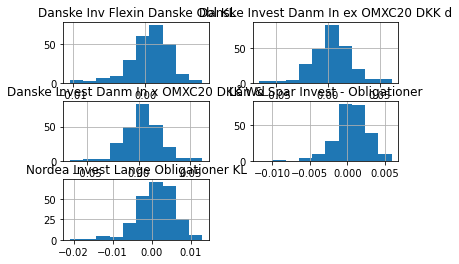

In [90]:
top5_mst.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90c622b730>,
      dtype=object)

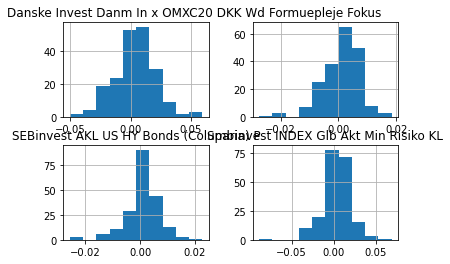

In [91]:
new_df2.hist()

### Question 18

Draw density function of returns for each of the assets.

/Users/akitsalkitzidis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


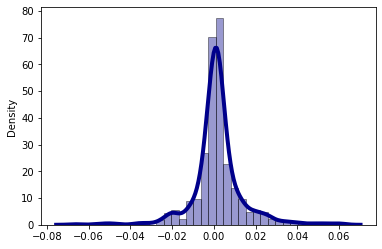

In [92]:
import seaborn as sns
# Density Plot and Histogram of all arrival delays
plt.figure()
sns.distplot(top5_mst, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/Users/akitsalkitzidis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


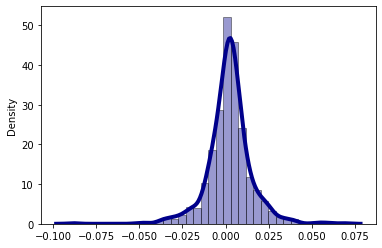

In [93]:
import seaborn as sns
# Density Plot and Histogram of all arrival delays
plt.figure()
sns.distplot(new_df2, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Question 19

Draw QQ-Plots of returns for each of the assets.

In [94]:
new_df2[:3]

,Danske Invest Danm In x OMXC20 DKK Wd,SEBinvest AKL US HY Bonds (Columbia) P,Sparinvest INDEX Glb Akt Min Risiko KL,Formuepleje Fokus
0,0.026842,0.007369,0.014634,-0.001552
1,0.052388,0.001111,-0.005839,-0.006993
2,-0.007053,0.004347,-0.006088,0.002347


In [95]:
top5_mst

,Danske Invest Danm In ex OMXC20 DKK d,Danske Invest Danm In x OMXC20 DKK Wd,Danske Inv Flexin Danske Obl KL,Lån & Spar Invest - Obligationer,Nordea Invest Lange Obligationer KL
0,0.026842,0.026842,-0.000395,-0.000111,0.002655
1,0.052388,0.052388,0.000395,0.000555,0.001040
2,-0.007053,-0.007053,-0.005921,-0.005765,-0.011619
3,-0.004941,-0.004941,0.004268,0.003680,0.011660
4,0.017587,0.017587,-0.001581,-0.002555,-0.005668
...,...,...,...,...,...
246,-0.004175,-0.004175,0.003406,0.001461,0.007413
247,0.008385,0.008385,-0.001261,-0.000561,-0.004396
248,-0.015954,-0.015954,-0.002913,-0.003706,-0.005663
249,0.010219,0.010219,-0.000195,0.000789,0.001448


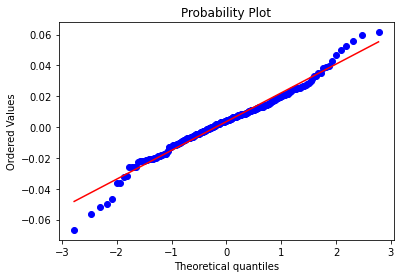

In [96]:
import statsmodels.api as sm
from scipy import stats
import pylab as py
    
stats.probplot(top5_mst.iloc[:,1], dist='norm', plot=plt)
plt.show()

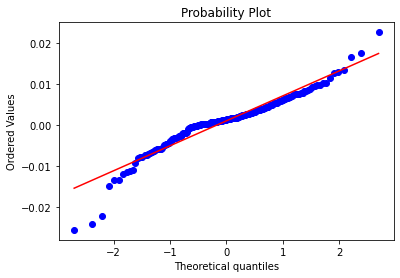

In [97]:
import statsmodels.api as sm
from scipy import stats
import pylab as py
    
stats.probplot(new_df2.iloc[:,1], dist='norm', plot=plt)
plt.show()

### Question 20

Perform a Jarque-Bera test for normality of return distributions for each of the assets.

In [98]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(top5_mst)
jarque_bera_test


Jarque_beraResult(statistic=2506.0091415533384, pvalue=0.0)

In [99]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(new_df2)
jarque_bera_test

Jarque_beraResult(statistic=1263.7513562021118, pvalue=0.0)

### Question 21

Measure and report skewness of returns for each of the assets.

In [100]:
from scipy.stats import skew
skew(top5_mst)

array([-0.15956917, -0.15956917, -0.91406965, -1.2699568 , -0.69053794])

In [101]:
from scipy.stats import skew
skew(new_df2)

array([-0.01614862, -0.80357807, -0.69986709, -0.96623576])

### Question 22

Measure and report kurtosis of returns for each of the assets.

In [102]:
from scipy.stats import kurtosis
kurtosis(top5_mst)


array([1.53321054, 1.53321054, 2.0586742 , 3.77011467, 1.52818915])

In [103]:
from scipy.stats import kurtosis
kurtosis(new_df2)

array([0.99685774, 3.5485713 , 5.0845976 , 2.42749059])

### Question 23

For each of the assets, decide and report whether you can accept the return as being normally distributed.

By looking at the Jarque-Bera test, skewness and kurtosis, they are not normally distributed, since the Jarque-Bera test has to be rejected for the given confidence interval - the test statistic is very high and far from zero.